In [3]:
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
from datetime import time
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from numpy import sum as suma


Exploring the different districts of San fransisco, the Southern is by far the most violent, so i'll focus on it.

<img src="files/crimesdisttest.png">

The Southern district is indeed in the south, as it is clear by its name. Below a marker has been put on the coordinates of each crime commited in it.

<img src="files/SOUTHERN.png">

After importing the needed packages lets proceed to the analysis. We are going to explore how crime occurences develop
throughout the day in  hour intervals in the most violent district, the Southern.

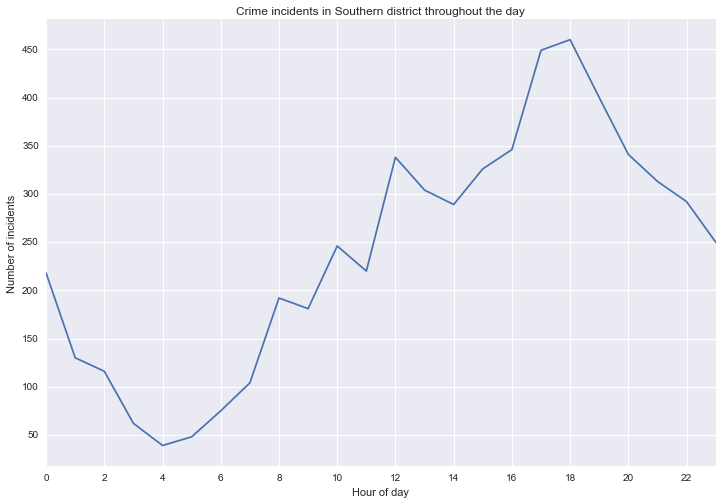

In [11]:
colorMapping = {}
dayMapping = {}
sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates={"Datetime": [5]})
sf = sf.set_index(['Datetime'])
sf1 = sf.where(sf['PdDistrict']=='SOUTHERN')
#Data is kinda ready after that
sf1 = sf1.dropna()


grouped = sf1.groupby(pd.TimeGrouper(freq='60Min')).count()

%matplotlib inline
grouped['index1'] = grouped.index.hour
pdnum = grouped.as_matrix(['index1','Resolution'])
time = pdnum[:,0]
values = pdnum[:,1]
plt.title('Crime incidents in Southern district throughout the day')
plt.ylabel('Number of incidents')
plt.xlabel('Hour of day')

ax = sns.tsplot(data=values, time=time)
fig = ax.get_figure()
fig.set_size_inches(12,8)


It is clear that in the night hours there is a significant drop in crimes commited which increases after 04:00, peaking at 18:00. This fact can also be seen by the figure below that compares the occurences of crimes in night and day periods. More crimes are commited during the day than during the night which is something slightly counterintuitive but can be justified by the fact that most human activity takes place during daylight hours.

Robberies, drunkeness, prostitution and driving under influence are the crimes that dominate the night. This is to be expected as they are crimes that are more 'attention-drawing' and such criminals avoid exposure to daylight.


<img src="files/crimes10day.png">

It is obvious that the Southern district is degraded comparing to the rest districts of San Fransisco. During this analysis the development of crimes through the day were explored. There are two peaks of crime incidents during daylight hours. One is at lunch time, 12:00 and the other is at 18:00 possibly when people are just done with their work. The peaks are definitely not accidental.

Your feedback is more than welcome! I hope you enjoyed my exploratory analysis and visualizations.